# Detect static channel cells using Laplacian of Gaussian(LoG) filter and intensity threshold

1. Ensure that both the Jupyter notebook and the helper_functions file are located in the same directory.
2. Adjust the sliders for the LoG filter, image intensity threshold, and cell size until optimal detection is attained.

## 0. Set up the required libraries and load a static image for further processing.



### 0.1 Verify and install any absent packages, then import the helper functions.ions.



In [1]:
import importlib
from collections import defaultdict
from typing import Optional
import os
from pip._internal import main as pip_main
from helper_functions import *

### 0.2 load an isxd image

In [2]:
folders = {
    "nVue_red": "./"
}

filenames = {
    "nVue_red": "2020-12-21-13-10-44_video_red-PP-BP-Maximum Image.isxd"
}
image_path = "./2020-12-21-13-10-44_video_red-PP-BP-Maximum Image.isxd"
isxd_path = image_path
print(image_path)
images = {
    key: read_image(os.path.join(folder, filenames[key]))
    for key, folder in folders.items()
}

nVue_red = images["nVue_red"]
print(nVue_red.shape)

./2020-12-21-13-10-44_video_red-PP-BP-Maximum Image.isxd
(163, 190)


### 0.3 display the original static channel image

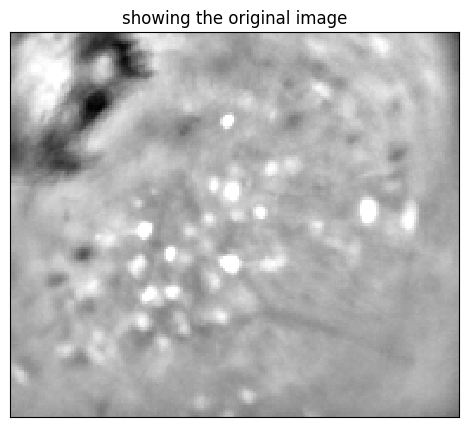

In [3]:
img_demean = nVue_red - np.mean(nVue_red)

title = "showing the original image"
show_img(img_demean, title=title, percentile=99)

## 1. Enhance red cell contrast by convolving the image with a Laplacian of Gaussian (LoG) filter

###  1.1 convolve the image with a LoG filter and display the convolved image

In [4]:
convolve_widget = convolve_with_slider(
    img_demean, title="the image after convolution with a LoG filter", percentile=99
)
convolve_widget

### 1.2 apply intensity threshold to review suprathreshold ROIs

In [5]:
# Refine the two threshold sliders to enhance cell detection: the first for the convolved image and the second for the raw image.
# The parameter 'n_std' ensures that only values above 'n_std' plus the mean will be displayed.
# Meanwhile, 'image_threshold' filters for values above the specified percentage of luminance.

cell_diameter = convolve_widget.children[0].children[0].value
threshold_widget = threshold_with_sliders(img_demean, cell_diameter=cell_diameter)
threshold_widget

## 2. Segment footprints with different sizes

In [6]:
# Fine-tune the three sizing sliders for optimal cell size and effective splitting.
# 'Size to split' determines the threshold between small and medium-sized cells, with medium cells undergoing a watershed filter for splitting.
# 'Min size' sets the minimum limit for small-sized cells.
# 'Max size' defines the maximum range for medium-sized cells.
sizing_widget, LoG_footprints = sizing_with_sliders(
    img_demean, threshold_widget, cell_diameter=cell_diameter
)

interactive(children=(FloatSlider(value=1.2, description='Size to split', max=5.0, min=1.0), FloatSlider(value…

Output(layout=Layout(margin='0 0 0 30px'))

Button(description='Show final footprints', style=ButtonStyle())

In [7]:
# Adjust the slider to enlarge the footprints

slider, segmented_footprints = process_with_n_slider(
    sizing_widget, img_demean, LoG_footprints, cell_diameter
)

IntSlider(value=0, description='Enlarge by N pixel:', max=10)

Output()

In [8]:
final_footprints = enlarge_footprints(segmented_footprints, slider)
#np.save('red_cells.npy', red_cells)

In [10]:
# A new file will be created with an "autoseg" suffix,
# enabling its import into the Inscopix processing software
# for the detailed examination of individual red cells or the execution of multicolor registration.

segmented_cell_set = footprints_export_to_isxd(image_path, isxd_path, final_footprints, suffix="_autoseg_github")

A new file has been generated: /workspaces/static_cell_detection/2020-12-21-13-10-44_video_red-PP-BP-Maximum Image_autoseg_github.isxd
